g

# Description du Projet

Ce projet utilise l'application Vanna AI pour se connecter à une base de données SQLite et interroger les données. Vanna AI est une plateforme qui permet de poser des questions en langage naturel et d'obtenir des réponses basées sur les données. Dans ce projet, nous utilisons le modèle 'chinook' pour interroger une base de données musicale.

## Installation des dépendances

Nous commençons par installer le module `vanna` nécessaire pour utiliser l'application Vanna AI.

## Connexion à la base de données

Nous nous connectons à une base de données SQLite hébergée en ligne en utilisant les informations d'identification fournies.

## Interrogation de la base de données

Nous posons une question à la base de données pour obtenir les 10 meilleurs artistes par ventes.

## Lancement de l'application Flask

Nous utilisons Flask pour lancer une application web qui permet d'interagir avec Vanna AI.


In [1]:
#!pip install vanna

^C


In [4]:
# Import the VannaDefault class from the vanna.remote module
from vanna.remote import VannaDefault
import config

# Create an instance of VannaDefault with the specified model and API key
vn = VannaDefault(model='chinook', api_key=config.API_KEY)




In [7]:
vn.connect_to_sqlite('https://vanna.ai/Chinook.sqlite')


In [5]:
import requests
from IPython.display import Image, display

# URL of the image on GitHub
image_url = 'https://github.com/your-repo/your-image-path.png'

# Fetch the image
response = requests.get(image_url)

# Display the image
display(Image(response.content))
# Display a talk about the Chinook SQLite database
print("The Chinook database is a sample database available for learning and practicing SQL. It contains a set of tables for a digital media store, including information about artists, albums, media tracks, invoices, and customers. The database schema is designed to be similar to a real-world database, making it a useful resource for practicing SQL queries and database management.")
# URL of the MCD image for the Chinook database
mcd_image_url = 'https://www.sqlitetutorial.net/wp-content/uploads/2018/03/sqlite-sample-database-color.jpg'

# Fetch the MCD image
mcd_response = requests.get(mcd_image_url)

# Display the MCD image
display(Image(mcd_response.content))

The Chinook database is a sample database available for learning and practicing SQL. It contains a set of tables for a digital media store, including information about artists, albums, media tracks, invoices, and customers. The database schema is designed to be similar to a real-world database, making it a useful resource for practicing SQL queries and database management.


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE [Artist]\n(\n    [ArtistId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(120),\n    CONSTRAINT [PK_Artist] PRIMARY KEY  ([ArtistId])\n)\n\nCREATE TABLE [Album]\n(\n    [AlbumId] INTEGER  NOT NULL,\n    [Title] NVARCHAR(160)  NOT NULL,\n    [ArtistId] INTEGER  NOT NULL,\n    CONSTRAINT [PK_Album] PRIMARY KEY  ([AlbumId]),\n    FOREIGN KEY ([ArtistId]) REFERENCES [Artist] ([ArtistId]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX [IFK_AlbumArtistId] ON [Album] ([ArtistId])\n\nCREATE TABLE [Track]\n(\n    [TrackId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(200)  NOT NULL,\n    [AlbumId] INTEGER,\n    [MediaTypeId] INTEGER  NOT NULL,\n    [GenreId] INTEGER,\n    [Composer] NVARCHAR(220),\n    [Milliseconds] INT

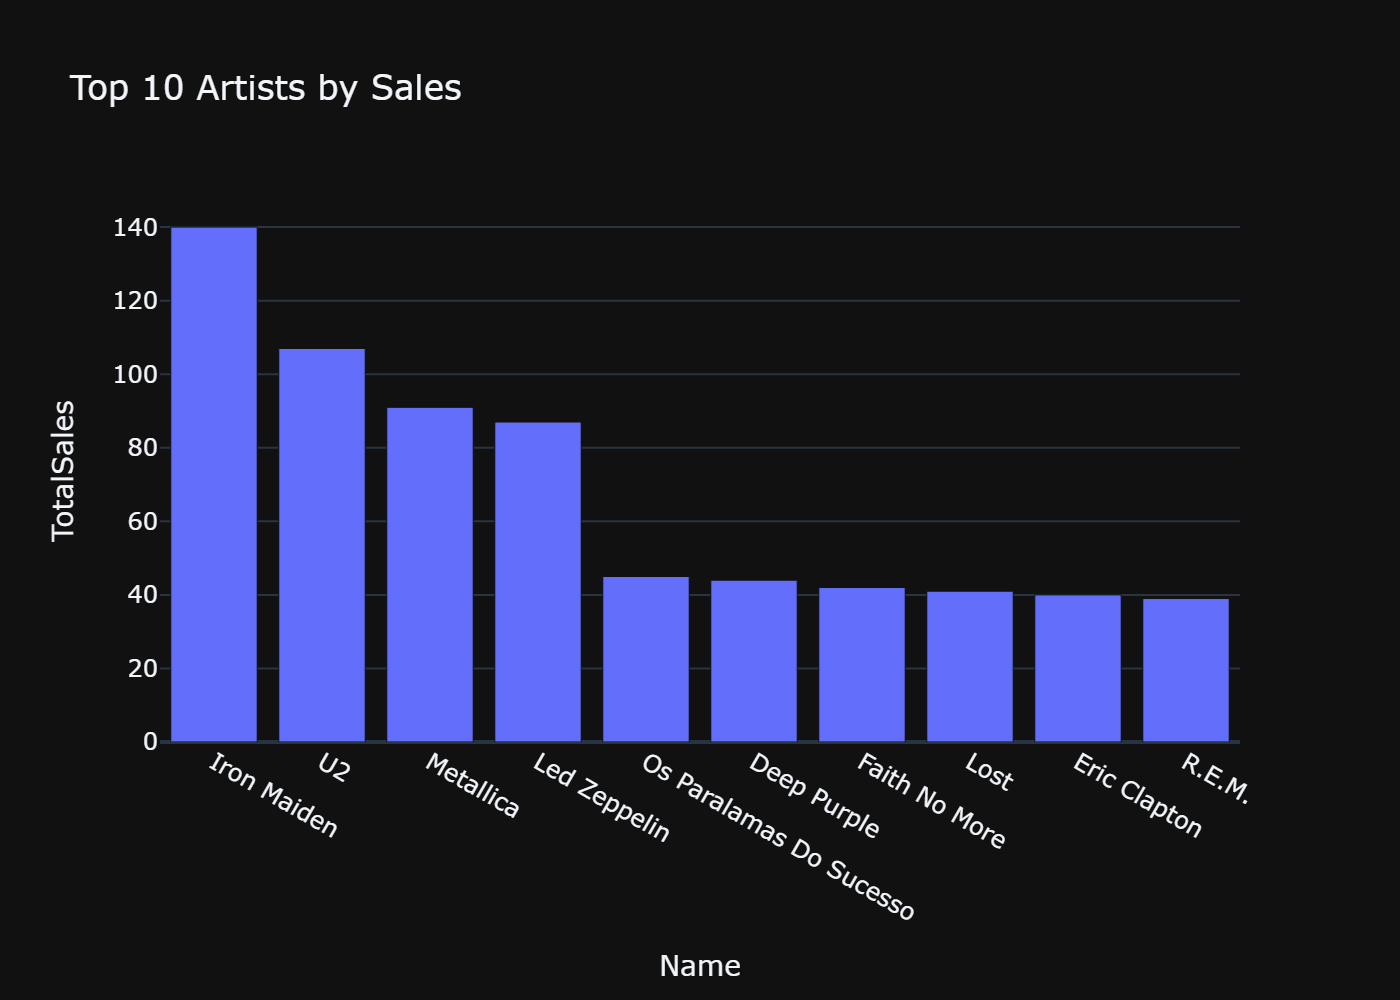

('SELECT a.ArtistId, a.Name, SUM(il.Quantity) AS TotalSales\nFROM Artist a\nJOIN Album al ON a.ArtistId = al.ArtistId\nJOIN Track t ON al.AlbumId = t.AlbumId\nJOIN InvoiceLine il ON t.TrackId = il.TrackId\nGROUP BY a.ArtistId, a.Name\nORDER BY TotalSales DESC\nLIMIT 10;',
    ArtistId                     Name  TotalSales
 0        90              Iron Maiden         140
 1       150                       U2         107
 2        50                Metallica          91
 3        22             Led Zeppelin          87
 4       113  Os Paralamas Do Sucesso          45
 5        58              Deep Purple          44
 6        82            Faith No More          42
 7       149                     Lost          41
 8        81             Eric Clapton          40
 9       124                   R.E.M.          39,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'Name=%{x}<br>TotalSales=%{y}<extra></extra>',
               'legendgroup': '',
            

In [8]:
vn.ask('What are the top 10 artists by sales?')

In [12]:
vn.ask('What are the top 10 tracks by album?')

SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE [Album]\n(\n    [AlbumId] INTEGER  NOT NULL,\n    [Title] NVARCHAR(160)  NOT NULL,\n    [ArtistId] INTEGER  NOT NULL,\n    CONSTRAINT [PK_Album] PRIMARY KEY  ([AlbumId]),\n    FOREIGN KEY ([ArtistId]) REFERENCES [Artist] ([ArtistId]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX [IFK_TrackAlbumId] ON [Track] ([AlbumId])\n\nCREATE TABLE [Track]\n(\n    [TrackId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(200)  NOT NULL,\n    [AlbumId] INTEGER,\n    [MediaTypeId] INTEGER  NOT NULL,\n    [GenreId] INTEGER,\n    [Composer] NVARCHAR(220),\n    [Milliseconds] INTEGER  NOT NULL,\n    [Bytes] INTEGER,\n    [UnitPrice] NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT [PK_Track] PRIMARY KEY  ([TrackId]),\n    FOREIGN KEY

In [ ]:
from vanna.flask import VannaFlaskApp
VannaFlaskApp(vn).run()

Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'
 * Debug mode: on


Traceback (most recent call last):
  File "C:\Users\ganci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\flask\app.py", line 1498, in __call__
    return self.wsgi_app(environ, start_response)
  File "C:\Users\ganci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\flask\app.py", line 1476, in wsgi_app
    response = self.handle_exception(e)
  File "C:\Users\ganci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\flask\app.py", line 1473, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\ganci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\flask\app.py", line 882, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\ganci\AppData\Local\Packages\Py

None
None
None


!pip install vanna

from vanna.remote import VannaDefault
vn = VannaDefault(model='chinook', api_key='70021c476ed5486a9f9257dce836a600')
vn.connect_to_sqlite('https://vanna.ai/Chinook.sqlite')
vn.ask('What are the top 10 artists by sales?')

from vanna.flask import VannaFlaskApp
VannaFlaskApp(vn).run()